In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [2]:
import numpy as np

In [3]:
def encircle(feat, label): #this function is to encircle feature with its corresponding label
    area = feat.shape[0]
    s = int(np.sqrt(area))
    newfeat = np.zeros((s+2,s+2))
    if label == 1: #fill the border with 1
        for i in range(s+2):
            for j in range(s+2):
                if i == 0 or i == s+1 or j == 0 or j == s+1: 
                    newfeat[i,j] = 1
    
    for idx, val in enumerate(feat):
        newfeat[1 + idx // s, 1 + idx % s] = val
    return newfeat.flatten()

In [4]:
def encircled_fill_image_matr(data2d, labels, ncols):
    nsubimgs, area = data2d.shape
    l = w = int(np.sqrt(area))
    l += 2
    w += 2
    imgs = np.zeros((l*nsubimgs//ncols, w*ncols))
    for count, each in enumerate(data2d):
        row = count // ncols
        col = count % ncols
        enc_each = encircle(each, labels[count])
        for idx, val in enumerate(np.rint(enc_each*255)): #iterate over elements of feature
            x, y = idx // w, idx % w 
            imgs[row*l+x, col*w +y] = val
    return imgs

def fill_image_matr(data2d, ncols):
    nsubimgs, area = data2d.shape
    l = w = int(np.sqrt(area))
    imgs = np.zeros((l*nsubimgs//ncols, w*ncols))
    for count, each in enumerate(data2d):
        row = count // ncols
        col = count % ncols
        for idx, val in enumerate(np.rint(each*255)): #iterate over elements of feature
            x, y = idx // w, idx % w 
            imgs[row*l+x, col*w +y] = val
    return imgs

In [5]:
#get FMNIST data 
fmnist_train_label = np.load('fmnist_train_Label.npy')[0:100]
fmnist_train_feat = np.load('fmnist_train_feat.npy')[0:100]
fmnist_test_label = np.load('fmnist_test_Label.npy')[0:100]
fmnist_test_feat = np.load('fmnist_test_feat.npy')[0:100]
#get MNIST data 
mnist_train_label = np.load('mnist_train_Label.npy')[0:100]
mnist_train_feat = np.load('mnist_train_feat.npy')[0:100]
mnist_test_label = np.load('mnist_test_Label.npy')[0:100]
mnist_test_feat = np.load('mnist_test_feat.npy')[0:100]

FMNIST TRAIN


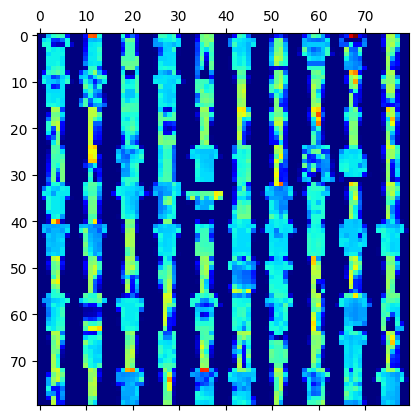

In [6]:
#plot fmnist train
#from PIL import Image
import matplotlib.pyplot as plt
imgs = fill_image_matr(fmnist_train_feat, 10)
print("FMNIST TRAIN")
plt.matshow(imgs, cmap='jet')
plt.savefig('fmnist_train.png')

ENCIRCLED FMNIST TRAIN


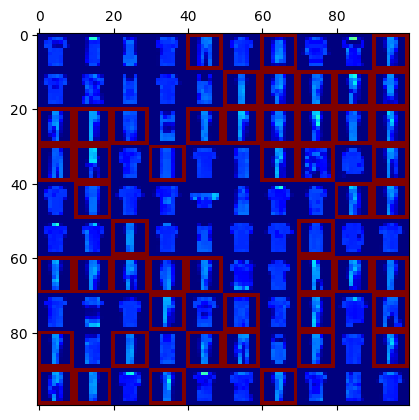

In [7]:
imgs = encircled_fill_image_matr(fmnist_train_feat, fmnist_train_label, 10)
print("ENCIRCLED FMNIST TRAIN")
plt.matshow(imgs, cmap='jet')
plt.savefig('encircled_fmnist_train.png')

FMNIST TEST


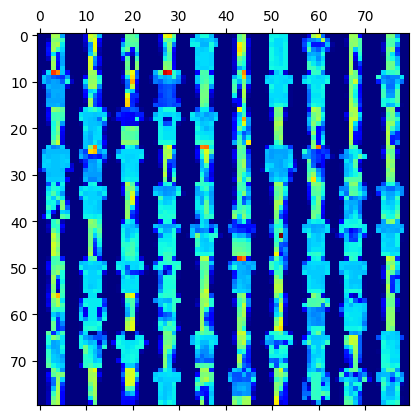

In [8]:
#plot fmnist test
imgs = fill_image_matr(fmnist_test_feat, 10)
print("FMNIST TEST")
plt.matshow(imgs, cmap='jet')
plt.savefig('fmnist_test.png')

ENCIRCLED FMNIST TEST


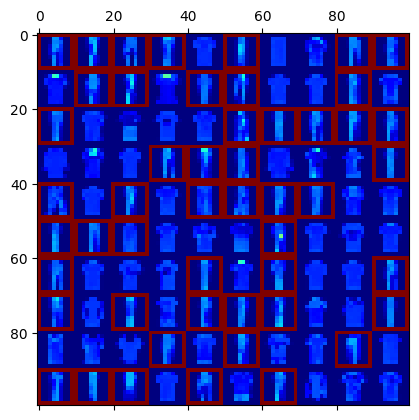

In [9]:
#plot encircled fmnist test
imgs = encircled_fill_image_matr(fmnist_test_feat, fmnist_test_label, 10)
print("ENCIRCLED FMNIST TEST")
plt.matshow(imgs, cmap='jet')
plt.savefig('encircled_fmnist_test.png')

MNIST TRAIN


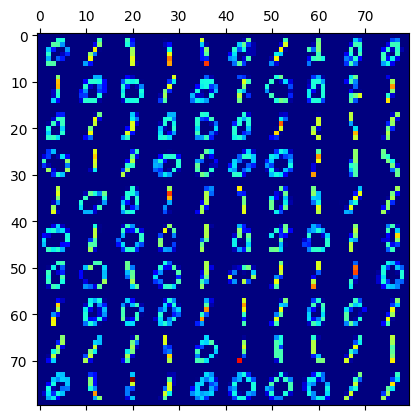

In [10]:
#plot mnist train
imgs = fill_image_matr(mnist_train_feat, 10)
print("MNIST TRAIN")
plt.matshow(imgs, cmap='jet')
plt.savefig('mnist_train.png')

ENCIRCLED MNIST TRAIN


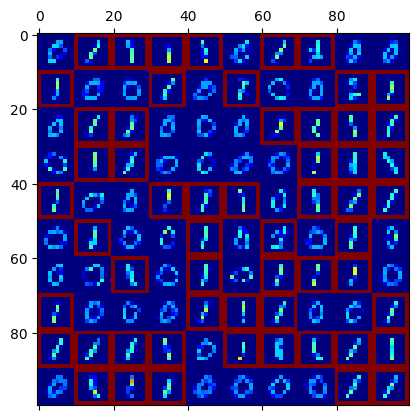

In [11]:
#plot encircled mnist train
imgs = encircled_fill_image_matr(mnist_train_feat, mnist_train_label, 10)
print("ENCIRCLED MNIST TRAIN")
plt.matshow(imgs, cmap='jet')
plt.savefig('encircled_mnist_train.png')

MNIST TEST


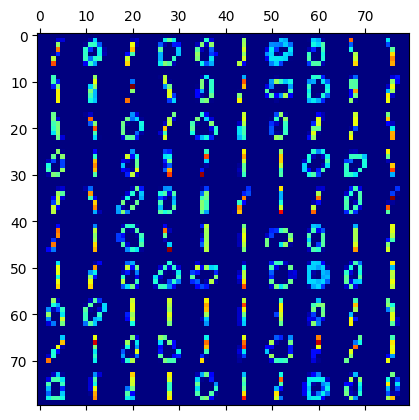

In [12]:
#plot mnist test
imgs = fill_image_matr(mnist_test_feat, 10)
print("MNIST TEST")
plt.matshow(imgs, cmap='jet')
plt.savefig('mnist_test.png')

ENCIRCLED MNIST TEST


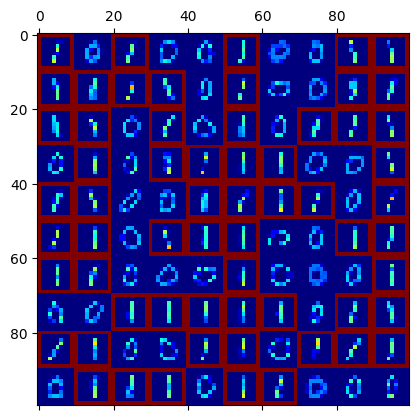

In [13]:
imgs = encircled_fill_image_matr(mnist_test_feat, mnist_test_label, 10)
print("ENCIRCLED MNIST TEST")
plt.matshow(imgs, cmap='jet')
plt.savefig('encircled_mnist_test.png')

In [14]:
np.sum(fmnist_train_label)

0

In [15]:
np.sum(fmnist_test_label)

0

In [16]:
np.sum(mnist_train_label)

14

In [17]:
np.sum(mnist_test_label)

24